# Boston Housing Project:- SciKit
I am going to use SciKit learn to predict housing prices. This project uses linear regression concept of machine learning. This is my fourth project using online resources/courses on data science & machine learning. Please email me on kay.pandya@gmail.com with questions or suggestions on improving my methods for this project or any other project.

I am going to start this project by getting basic library imports.

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

In [3]:
#loading boston data for project.
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
#Printing our boston dataset
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

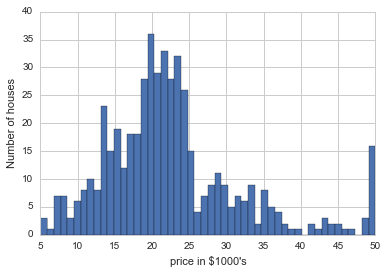

In [6]:
#I try to plot as soon as possible to get idea about the project.
#It also gives me unusual objects or data involved in the project.
plt.hist(boston.target,bins=50)
plt.xlabel("price in $1000's")
plt.ylabel("Number of houses")

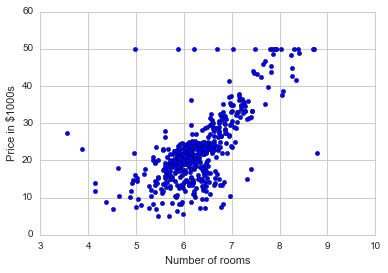

In [7]:
# scatter plot rooms vs price
plt.scatter(boston.data[:,5],boston.target)

#label
plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')

In [9]:
#Creating boston dataframe to start manipulating the data and progress towards predicting.
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [10]:
#Let's add price column
boston_df["Price"]=boston.target

In [11]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


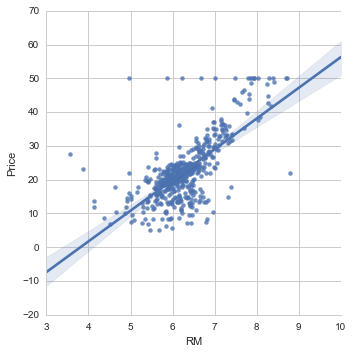

In [12]:
#linear plot for RM vs price
sns.lmplot("RM","Price",data=boston_df)

Numpy has a built in Least Square Method in it's library. I will use that for single variable linear regression than I will move to SciKit for multi-variable linear regression.


In [13]:
# X as median room values
X = boston_df.RM

# Using v to make X two dimensional
X = np.vstack(boston_df.RM)

# Set up Y as the target price of the houses.

Y = boston_df.Price